UGANDA CHRISTIAN UNIVERSITY 

FACULTY OF ENGINEERING, DESIGN AND TECHNOLOGY

DEPARTMENT OF COMPUTING AND TECHNOLOGY

EASTER 2025 SEMESTER EXAMINATION

NAME: CHEMAYEK MARTIN   REG NUMBER: J25M19/026  ACCESS NUMBER: B31377

PROGRAM: MASTER OF SCIENCE IN DATA SCIENCE & ANALYTICS

YEAR: 1 SEMESTER: 1

COURSE CODE: DSC8201

COURSE NAME: DATA SCIENCE LIFECYCLE

EXAMINATION TYPE: PROJECT-BASED EXAM

Theme 1: Global Health- Predicting disease outbreak/Diagnosis for Malaria 

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset (adjust the file path/name as needed)
df_malaria = pd.read_csv("Malaria.csv")
print(df_malaria.head())

   Country Name  Year Country Code  \
0       Algeria  2007          DZA   
1        Angola  2007          AGO   
2         Benin  2007          BEN   
3      Botswana  2007          BWA   
4  Burkina Faso  2007          BFA   

   Incidence of malaria (per 1,000 population at risk)  \
0                                               0.01     
1                                             286.72     
2                                             480.24     
3                                               1.03     
4                                             503.80     

   Malaria cases reported  Rural population (% of total population)  \
0                    26.0                                     34.65   
1               1533485.0                                     42.48   
2                     0.0                                     58.44   
3                   390.0                                     42.07   
4                 44246.0                                     77.00

In [3]:
# Check data types
print(df_malaria.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 18 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Country Name                                                                        594 non-null    object 
 1   Year                                                                                594 non-null    int64  
 2   Country Code                                                                        594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                 550 non-null    float64
 4   Malaria cases reported                                                              550 non-null    float64
 5   Rural population (% of total population)                                            588 non-null   

In [4]:
# Check missing values
print(df_malaria.isnull().sum())

Country Name                                                                           0
Year                                                                                   0
Country Code                                                                           0
Incidence of malaria (per 1,000 population at risk)                                   44
Malaria cases reported                                                                44
Rural population (% of total population)                                               6
Rural population growth (annual %)                                                     6
Urban population (% of total population)                                               6
Urban population growth (annual %)                                                     6
People using at least basic drinking water services (% of population)                  6
People using at least basic drinking water services, rural (% of rural population)    28
People using at least

In [5]:
# Drop duplicate rows if present
df_malaria = df_malaria.drop_duplicates()

b. Cleaning and Transforming the Data

In [6]:
# Example: Convert 'Year' to an integer (or datetime if needed)
df_malaria['Year'] = pd.to_numeric(df_malaria['Year'], errors='coerce').astype('Int64')

In [7]:
# Handle missing values
df_malaria.fillna(method='ffill', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_2748\1650902206.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_malaria.fillna(method='ffill', inplace=True)


In [8]:
# Data type conversion
df_malaria['Year'] = df_malaria['Year'].astype(int)

In [9]:
# Normalization/Scaling
scaler = StandardScaler()
df_malaria[['Incidence of malaria (per 1,000 population at risk)', 'Malaria cases reported']] = scaler.fit_transform(
    df_malaria[['Incidence of malaria (per 1,000 population at risk)', 'Malaria cases reported']]
)

In [10]:
# Feature Engineering
df_malaria['Urban to Rural Population Ratio'] = df_malaria['Urban population (% of total population)'] / df_malaria['Rural population (% of total population)']

In [11]:
print(df_malaria.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Country Name                                                                        594 non-null    object 
 1   Year                                                                                594 non-null    int32  
 2   Country Code                                                                        594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                 594 non-null    float64
 4   Malaria cases reported                                                              594 non-null    float64
 5   Rural population (% of total population)                                            594 non-null   

3: Exploratory Data Analysis (EDA)

a. Explore Disease Trends Over Time and Across Regions

Time Series Analysis: Plot the incidence of malaria over time for different regions/countries.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

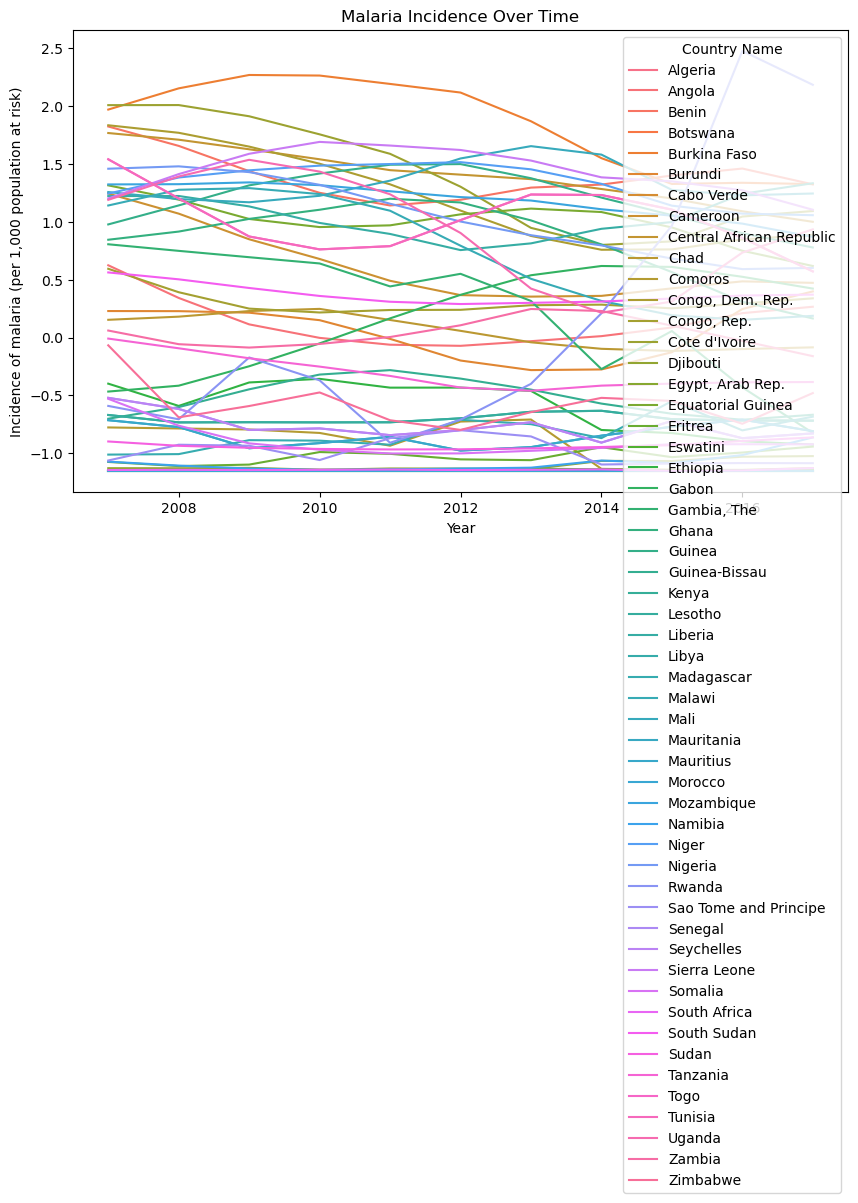

In [13]:
# Time Series Analysis
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_malaria, x='Year', y='Incidence of malaria (per 1,000 population at risk)', hue='Country Name')
plt.title('Malaria Incidence Over Time')
plt.show()

Interpretation 

Malaria incidence hs been dropping and static for many countries, however, a few countires like Niger, Nigera and Rwanda have had a sharp increase in malaria incidents between 2011 and 2016. This could be partly explained by issues of high population growth both at rural and urban areas. 

b. Identify Relationships Between Disease Variables and Environmental/Socio-Economic Variables

1. Correlation Analysis: Calculate correlation coefficients between malaria incidence and other variables.

2. Regression Analysis: Perform regression analysis to identify significant predictors of malaria incidence.

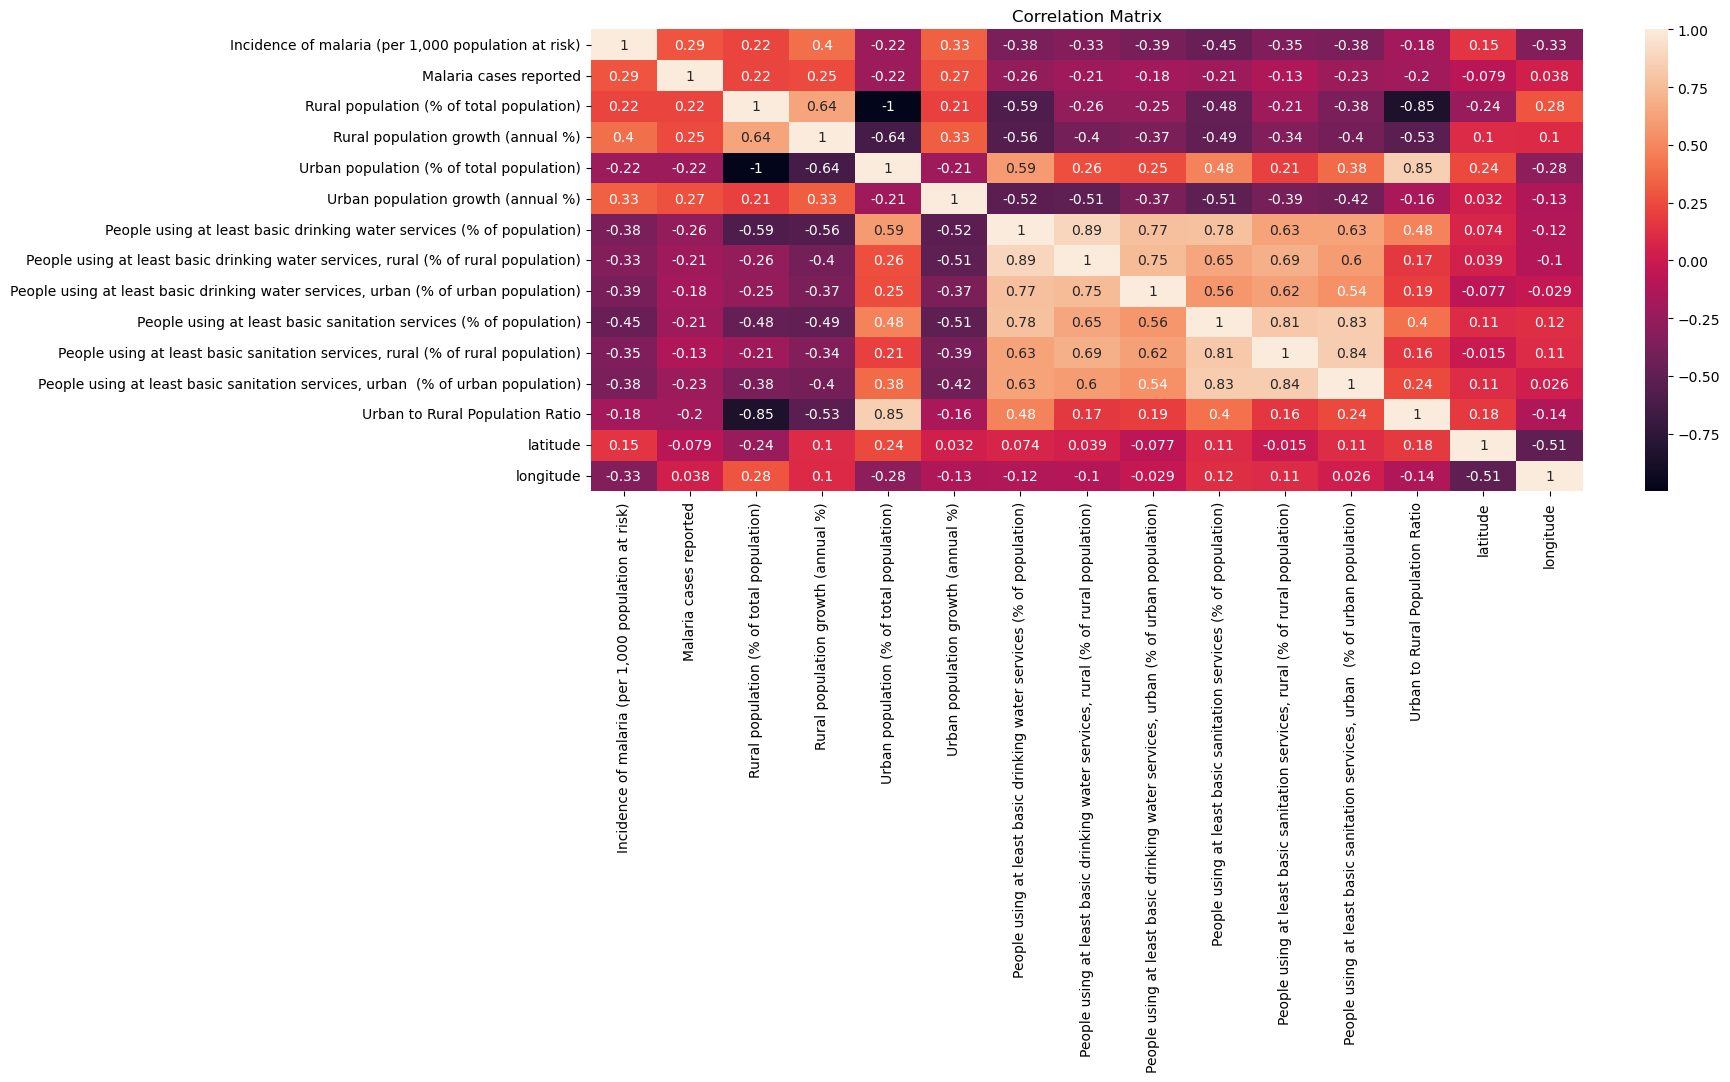

In [14]:
#Correlation between continuous variables and target Revenue
Variables=['Incidence of malaria (per 1,000 population at risk)','Malaria cases reported', 'Rural population (% of total population)', 'Rural population growth (annual %)', 'Urban population (% of total population)', 'Urban population growth (annual %)', 'People using at least basic drinking water services (% of population)', 'People using at least basic drinking water services, rural (% of rural population)', 'People using at least basic drinking water services, urban (% of urban population)', 'People using at least basic sanitation services (% of population)', 'People using at least basic sanitation services, rural (% of rural population)', 'People using at least basic sanitation services, urban  (% of urban population)', 'Urban to Rural Population Ratio', 'latitude', 'longitude']
#Plot the heatmap
plt.figure(figsize=(16,6))
sns.heatmap(df_malaria[Variables].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

Interpretation 

The correlation matrix above indicates that malaria incidence has a positive relationship with pupulation growth both at rural and urban areas 

In [15]:
# Regression Analysis
import statsmodels.api as sm

X = df_malaria[['Rural population growth (annual %)', 'Urban population growth (annual %)']]
y = df_malaria['Incidence of malaria (per 1,000 population at risk)']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                                             OLS Regression Results                                            
Dep. Variable:     Incidence of malaria (per 1,000 population at risk)   R-squared:                       0.202
Model:                                                             OLS   Adj. R-squared:                  0.199
Method:                                                  Least Squares   F-statistic:                     74.87
Date:                                                 Sat, 15 Mar 2025   Prob (F-statistic):           1.04e-29
Time:                                                         18:57:10   Log-Likelihood:                -775.78
No. Observations:                                                  594   AIC:                             1558.
Df Residuals:                                                      591   BIC:                             1571.
Df Model:                                                            2                                  

Interpretation 

Since the p-value= 0.000<0.05, we conclude that Rural population growth and Urban population growth have a bearing on the malaria incidence across the regions.

4: Build, Evaluate, and Optimize Predictive Models

a. Use Suitable Statistical Analyses

1. Feature Selection: Use techniques like Lasso regression, Random Forest feature importance, or PCA to identify relevant variables.

In [16]:
# Load libraries 
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [17]:
# Lasso Regression for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
print("Lasso Coefficients:", lasso.coef_)

Lasso Coefficients: [0.         0.26450327 0.15045139]


In [18]:
# Random Forest for feature importance
rf = RandomForestRegressor()
rf.fit(X, y)
print("Random Forest Feature Importances:", rf.feature_importances_)

Random Forest Feature Importances: [0.         0.46427319 0.53572681]


In [19]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

b. Generate Machine Learning Model(s)

1. Model Selection: Choose appropriate models such as Linear Regression, Random Forest, Decision tree.

2. Training and Testing: Split the data into training and testing sets and train the models.

In [20]:
#Testing various ML Regression Models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
#Select the x=indepedent (Features), and y=dependent (Target variable)
X = df_malaria[['Rural population growth (annual %)', 'Urban population growth (annual %)']]
y = df_malaria['Incidence of malaria (per 1,000 population at risk)']

In [22]:
# Split the data into training and test sets (By 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#List the regressor algorithms
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
}

In [24]:
# Function to evaluate and print model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

#USe the function to evaulate each algorithm
# Evaluate each model
results = {}
for name, model in models.items():
    mae, mse, rmse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R²: {metrics['R²']:.2f}\n")

Linear Regression:
  MAE: 0.77
  MSE: 0.77
  RMSE: 0.88
  R²: 0.15

Decision Tree Regressor:
  MAE: 0.53
  MSE: 0.84
  RMSE: 0.92
  R²: 0.08

Random Forest Regressor:
  MAE: 0.47
  MSE: 0.46
  RMSE: 0.68
  R²: 0.50



The Random Forest Regressor demonstrates the best performance across almost all metrics, with the lowest MAE, MSE, and RMSE, as well as the highest R² value, indicating it is the best model

In [25]:
# Saving the Random Forest Regressor model as a joblib
import joblib
joblib.dump(RandomForestRegressor(), 'disease_predictor.joblib')
print("Model saved as Random Forest Regressor Model called 'disease_predictor.joblib'.")

Model saved as Random Forest Regressor Model called 'disease_predictor.joblib'.


In [26]:
#Import model and used it
import joblib
# Load the saved model
model1 = joblib.load('disease_predictor.joblib')
model1.fit(X_train, y_train)
# Make predictions using the test dataset (x_test)
prediction = model1.predict(X_test)

# Print or use the predictions as needed
print(prediction)

[ 1.31665872 -0.44694375 -1.00541795 -0.13531954  0.4031511   1.08488095
  0.80052287 -0.03482422  0.5105217  -1.15045937 -0.47266917  0.16628134
 -0.49051113 -0.52982492 -0.55766343  1.13240557 -0.5435933   1.01014076
 -0.98174465  0.44664777 -0.20782619 -1.13324086  0.72181304  0.75614358
 -0.89217911 -1.13940331 -1.15302019 -0.73250854 -0.57633126 -0.20717079
 -0.71333768 -0.29717836 -0.22134466  0.73149586 -0.58052915  0.36840334
 -0.74520146  1.26842206 -1.0322744  -0.73409826 -0.32035515  0.14876625
 -0.33267374 -0.87982981  0.00351539  1.35476366 -0.79397774  0.54575409
  0.19820311 -0.81058881  1.02051888  0.70204239 -0.78092756  0.39754957
 -0.56480443 -0.25016484  0.64378302 -1.15120222 -0.61260629  0.6104542
  0.08567943 -0.9450925   1.1824664  -1.03200955 -1.04660913  1.60666609
  1.19050182 -0.25071935 -0.80088998 -0.52608063  0.82929219 -0.30243658
 -0.53777803  0.09305116  0.30170816 -0.16809881 -0.82971067  0.19820311
 -0.50277638  0.01508653  1.40120081  1.02590456 -1.

c. Validate the Performance of Above-Generated Model(s)

1. Evaluation Metrics: Use metrics like RMSE, MAE, R-squared for regression models.

2. Cross-Validation: Perform cross-validation to ensure model robustness.


In [27]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Cross-Validation
cv_scores = cross_val_score(model1, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.42159133 0.61849271 0.54543903 0.47276542 0.29469662]
